# Programming exercise \#1 of ESS 412/512

We will do 3 exercises:
## 1. Travel-time curves in a 1D Earth model (chapter 4, question 8 of ITS). 10 points.
## 2. Global phase recognition in seismograms from teleseismic earthquakes. 10 points.
## 3. Travel-time tomography in a 2D Earth (chapter 5, question2 of the 3rd edition of ITS). 10 points.

In [ ]:
# we need to install obspy
!pip install obspy
!pip install matplotlib
!pip install numpy
!pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## 1. Travel-time in a 1D Earth


Write a computer program in this notebook to solve Chapter 4, Exercise 8: Calculate travel time curves for an oceanic crustal model using ray tracing. 

In this programming exercise, you will be expected to document your scripting and construct your code using best-practices for python programming. Some resources to get started in python are provided by the [Software Carpentry](!https://swcarpentry.github.io/python-novice-inflammation/).

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


We will need the function ```layerxt``` that calculate ``dX`` and ``dT`` as a function of the ray parameter ``p``, layer thickness, and slowness at the top and bottom of a given layer with a constant velocity gradient.

In [ ]:
# LAYERXT calculates dx and dt for a ray in a layer with a linear
#   velocity gradient.  This is a highly modified version of a
#   Fortran subroutine in Chris Chapman's WKBJ program.
#
# Inputs:   p     =  horizontal slowness
#           h     =  layer thickness
#           utop  =  slowness at top of layer
#           ubot  =  slowness at bottom of layer
# Returns:  dx    =  range offset
#           dt    =  travel time
#           irtr  =  return code
#                 = -1,  zero thickness layer
#                 =  0,  ray turned above layer
#                 =  1,  ray passed through layer
#                 =  2,  ray turned in layer, 1 leg counted in dx,dt
def layerxt(p, h, utop, ubot):
  # returns [dx, dt, irtr]
  
  if p >= utop:
     return [0.0, 0.0, 0]
  elif h==0:
     return [0.0, 0.0, -1]
  else:
    b = 1.0/(ubot*h) - 1.0/(utop*h)
    def eta(u): return np.sqrt(u**2 - p**2)
    def x(u): return eta(u)/(u*b*p)
    def t(u): return (np.log((u + eta(u))/p))/b
    if utop == ubot:
       return [h*p/eta(utop), h*utop**2/eta(utop), 1 ]
    elif p>=ubot:
       return [x(utop), t(utop), 2]
    else:
       return [x(utop) - x(ubot), t(utop) - t(ubot), 1]

Now we will tackle Exercise 8 from Chapter 4 in "Introduction to Seismology".

Consider MARMOD, a velocity-versus-depth model, which is typical of much of the oceanic crust (Table 1). Linear velocity gradients are assumed to exist at intermediate depths in the model; for example, the P velocity at 3.75 km is 6.9 km/s.Write a computer program to trace rays through this model and produce a P-wave T(X) curve, using 100 values of the ray parameter p equally spaced between 0.1236 and 0.2217 s/km.

Table 1. MARMOD, a generic marine seismic model

| Depth (km) | Vp (km/s) | Vs (km/s) | density (kg/dm^3) |
| ---------- | -------- | ---------| -------|
| 0.0 | 4.5 | 3.4 | 2.0|
| 1.5 | 6.8 | 3.75 | 2.8 |
| 6.0 | 7.0 | 3.85 | 2.9 |
| 6.5 | 8.0 | 4.6 | 3.1 |
| 10.0 | 8.1 | 4.7 | 3.1 |

Your program will involve an outer loop over ray parameter  $p$ and an inner loop over depth in the model.

For each ray, set ``x`` and ``t`` to zero and then, starting with the surface layer and proceeding downward, sum the
contributions, ``dx`` and ``dt``, from ```LAYERXT``` for each layer until the ray turns. This will give x and t for the ray from the surface to the turning point.

Multiply by two to obtain the total surface-to-surface values of $X(p)$ and $T(p)$. 

We will produce of travel time and tau as a function of distance.  On each plot, label the prograde and retrograde branches. Where might one anticipate that the largest amplitudes will occur?

### a) Define the depth and velocity model (2  points)

In [ ]:
# solution

### b) Create the ray parameter vector with 100 values equally spaced between 0.1236 and 0.2217 s/km. (2 points)

In [ ]:
# solution

### c) Loop through ray parameters, calculate range offset and travel time. (4 points)

In [ ]:
#solution

### d) Plot the travel time T-X/8, Tau curve as a function of distance (2 points)

Text(0, 0.5, 'Depth (km)')

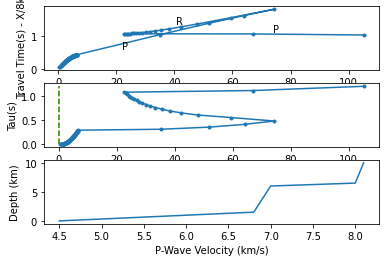

In [ ]:
fig,ax=plt.subplots(3,1)

## #2. Global Phase Recognition in teleseismic waveforms (10 points)

In this exercise, we will download the data from the recent M7.8 Earthquake in Turkey. The origin time of the earthquake was 2023-02-06 01:17:35 in UTC. The earthquake was a shallow crustal earthquakes at an approximate depth of 15 km.

We will look at the seisomgrams from a local station CI.HEC, specifically the HHZ channel.


Import modules

In [ ]:
import obspy
from obspy.clients.fdsn import Client 

### 1. Collect earthquake metadata from IRIS

In [ ]:
# get event info for the Turkey Earthquake 
client = Client("IRIS") # connect to IRIS earthquake service

# provide times t1 and t2 before and after earthquake 
t1 = obspy.UTCDateTime("2023-02-06") # for example 2000-01-01T00:00:00 for 1/1/2000
t2 = obspy.UTCDateTime("2023-02-09") #
cat = client.get_events(starttime=t1, endtime=t2, minmagnitude=7.6)
Mag = cat[0].magnitudes[0].mag
print("Magnitude of the earthquale:",Mag)
t0 = cat[0].origins[0].time
print("origin time of the earthquake:",t0)
lat0 = cat[0].origins[0].latitude
lon0 = cat[0].origins[0].longitude
depth0 = cat[0].origins[0].depth/1000 # convert to km
print("Hypocenter of the earthquake:",lat0,lon0,depth0)

Magnitude of the earthquale: 7.8
origin time of the earthquake: 2023-02-06T01:17:35.525000Z
Hypocenter of the earthquake: 37.1662 37.0421 17.943


### 2. Collect station metadata from IRIS 

In [ ]:
st=client.get_stations(network="IU",station="DWPF",location="*",channel="BHZ",\
                       starttime=t0-1800,endtime=t0+86400,level="response")
#station information
slat=st[0][0].latitude
slon=st[0][0].longitude

### 3. Calculate the distance between source and receiver.

In [ ]:
from obspy.geodetics.base import gps2dist_azimuth
from obspy.geodetics import locations2degrees
# find the great-arc distance, the azimmuth, and the backazimuth
dist,az,baz=gps2dist_azimuth(lat0,lon0,slat,slon)
print("great-arc distance in km",dist/1000.,"azimuth (deg)",az,"backazimuth (deg)",baz)
# find the angular distance between source and receiver
deg = locations2degrees(lat0,lon0,slat,slon)
print("angular distance (in deg)",deg)

great-arc distance in km 10349.32003340213 azimuth (deg) 309.13613906162584 backazimuth (deg) 44.51536185482274
angular distance (in deg) 92.89291268742701


### 4. Given a global Earth reference model (iasp91), predict the arrival time of global phases.

In [ ]:
from obspy.taup import TauPyModel
model = TauPyModel(model="iasp91")
arrivals = model.get_travel_times(source_depth_in_km=depth0,
                                  distance_in_degree=deg)
print(arrivals)

35 arrivals
	P phase arrival at 791.711 seconds
	PcP phase arrival at 792.200 seconds
	pP phase arrival at 797.717 seconds
	sP phase arrival at 800.002 seconds
	PP phase arrival at 1013.998 seconds
	PKiKP phase arrival at 1079.234 seconds
	pPKiKP phase arrival at 1085.397 seconds
	sPKiKP phase arrival at 1087.648 seconds
	SKiKP phase arrival at 1292.887 seconds
	SKS phase arrival at 1424.248 seconds
	pSKS phase arrival at 1432.471 seconds
	sSKS phase arrival at 1434.776 seconds
	SKKS phase arrival at 1441.819 seconds
	S phase arrival at 1456.634 seconds
	ScS phase arrival at 1458.223 seconds
	pS phase arrival at 1464.531 seconds
	sS phase arrival at 1466.930 seconds
	SP phase arrival at 1528.859 seconds
	SP phase arrival at 1530.234 seconds
	SP phase arrival at 1530.236 seconds
	PS phase arrival at 1531.366 seconds
	PS phase arrival at 1532.770 seconds
	PS phase arrival at 1532.771 seconds
	PKIKKIKP phase arrival at 1819.045 seconds
	PKKP phase arrival at 1821.026 seconds
	SS phase arr

We can get the specific travel times, ray parameters, and incidence angles. The P wave is the first element of the array ``arrivals``, S wave seems to be the 14th element.

In [ ]:
P=arrivals[0]
print("P wave ,",P.ray_param,P.time,P.incident_angle)
S=arrivals[13]
print("S wave ,",S.ray_param,S.time,S.incident_angle)

P wave , 263.58647639547075 791.7106541988658 13.884331499543734
S wave , 502.9513723659145 1456.6343334695043 15.381891014053755


### 5. Download seismic waveforms using the obspy function ``get_waveforms``, with the instrumental response, from IU.DWPF (a very good station in Florida) channel BHZ, location code ``00``. Download data from the origina time

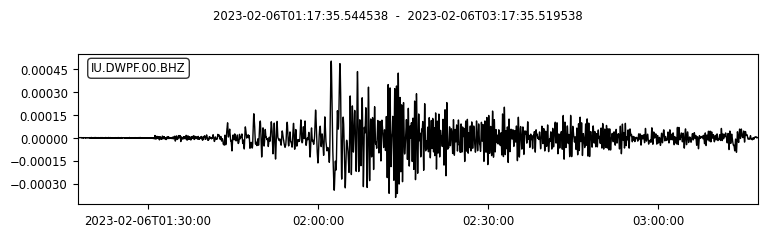

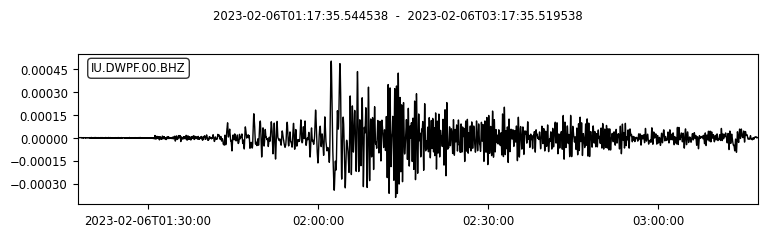

In [ ]:
# download waveform
tr=client.get_waveforms(network="IU",station="DWPF",channel="BHZ",location="00",starttime=t0,endtime=t0+7200,attach_response=True);
tr.remove_response(output="DISP")
tr.plot() 


Wow the data is not super clear. That is actually quite typical to strike slip events. Clear phase are better found using thrust earthquakes. 

Let's look at a different earthquake and repeat the steps above.
We will focus on the M8.3 2013 Sea of Okhotsk earthquake. It occured on May 24, 2013 at 05:44:49 UTC. Based on above, download waveforms at the same station but for the other earthquake

### a) Collect metadata from IRIS about the earthquake (2 points)

In [ ]:
#solution


Magnitude of the earthquale: 8.3
origin time of the earthquake: 2013-05-24T05:44:49.880000Z
Hypocenter of the earthquake: 54.815 153.3912 607.0


### b) Collect metadata from IRIS about the station (1 point)
We will use the same station IU.DWPF.00.BHZ.

In [ ]:
# get station information

### c) Download seismic waveforms (1 point)

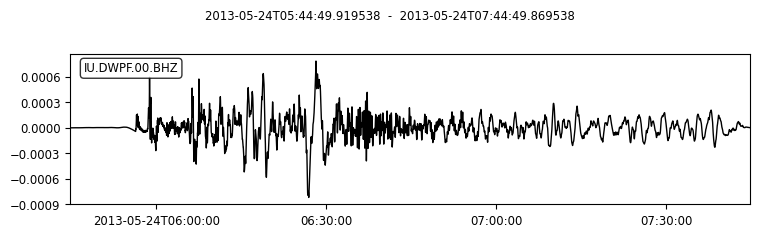

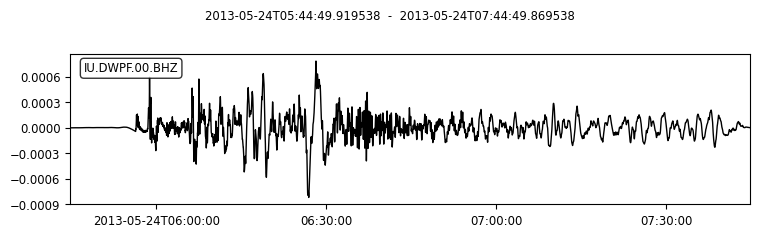

In [ ]:
# download waveforms

### Measure travel time of P and S waves

Find the index and time at which the main global phases appear in the waveforms. 
Hints:

* The sampling rate of the data (found in ``tr[0].stats.sampling_rate``)
* Plot the waveforms using matplotlib. add grid and play with `xlim` to zoom in.

Write the solutions in the appropriate cell

(13000.0, 16000.0)

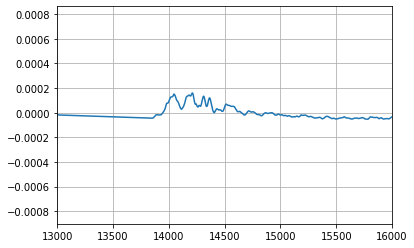

In [ ]:
# you get the P by zooming in

(20000.0, 30000.0)

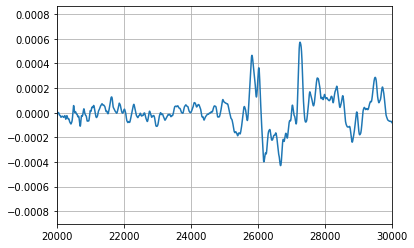

In [ ]:
# you get the S with another zoom in

## c) direct P wave (2 points)
Estimate the index and the time of arrival of the P wave from origin time.

In [ ]:
# solution
iP = # fill an integer about 
tP = # fill a float from what you found


### d) direct S wave (2 points) 
Hint, this one is harder to find. You may guide yourself with plots of global phases that are annotated with seismic phase type (e.g., [IRIS resource](!https://ds.iris.edu/ds/products/globalstacks/)).

In [ ]:
# solution
iP = # fill an integer 
tP = # fill a float from what you found

### e) Can you compare with the theoretical estimate. (2 points)
Use the TauP model from Obspy.

In [ ]:
# get travel time

29 arrivals
	P phase arrival at 729.112 seconds
	PcP phase arrival at 729.288 seconds
	pP phase arrival at 860.200 seconds
	sP phase arrival at 920.731 seconds
	PP phase arrival at 962.444 seconds
	PKiKP phase arrival at 1012.258 seconds
	pPKiKP phase arrival at 1152.381 seconds
	SKiKP phase arrival at 1169.814 seconds
	sPKiKP phase arrival at 1210.746 seconds
	SKS phase arrival at 1304.700 seconds
	SKKS phase arrival at 1325.350 seconds
	S phase arrival at 1343.235 seconds
	ScS phase arrival at 1343.907 seconds
	SP phase arrival at 1421.981 seconds
	pSKS phase arrival at 1491.937 seconds
	sSKS phase arrival at 1554.101 seconds
	sS phase arrival at 1579.650 seconds
	SS phase arrival at 1737.636 seconds
	PKIKKIKP phase arrival at 1752.085 seconds
	PKKP phase arrival at 1755.004 seconds
	SKIKKIKP phase arrival at 1909.523 seconds
	SKKP phase arrival at 1916.739 seconds
	PKIKKIKS phase arrival at 1967.884 seconds
	PKKS phase arrival at 1975.436 seconds
	SKIKKIKS phase arrival at 2125.149 

## 3. 2D tomography model (10 points)

Consider a 2-D tomography. model consisting of a 20 by 20 grid of square cells, for a total of 400 model points, which are envenly sampled by 20 horizontal rays, 20 vertical rays, 39 diagonal rays at +45$^\circ$, and 39 diagonal rays at -45$^\circ$. The figure below shows details of the model and the ray numbering scheme. To a first-order approximation, the ray paths are assumed straight before the background velocity model is homogeneous and the 2-D velocity perturbtion are small. The cell sizes and seismic velocities are such that the travel times are 1 s across each cell, or $\sqrt{2}$ s diagonally. 

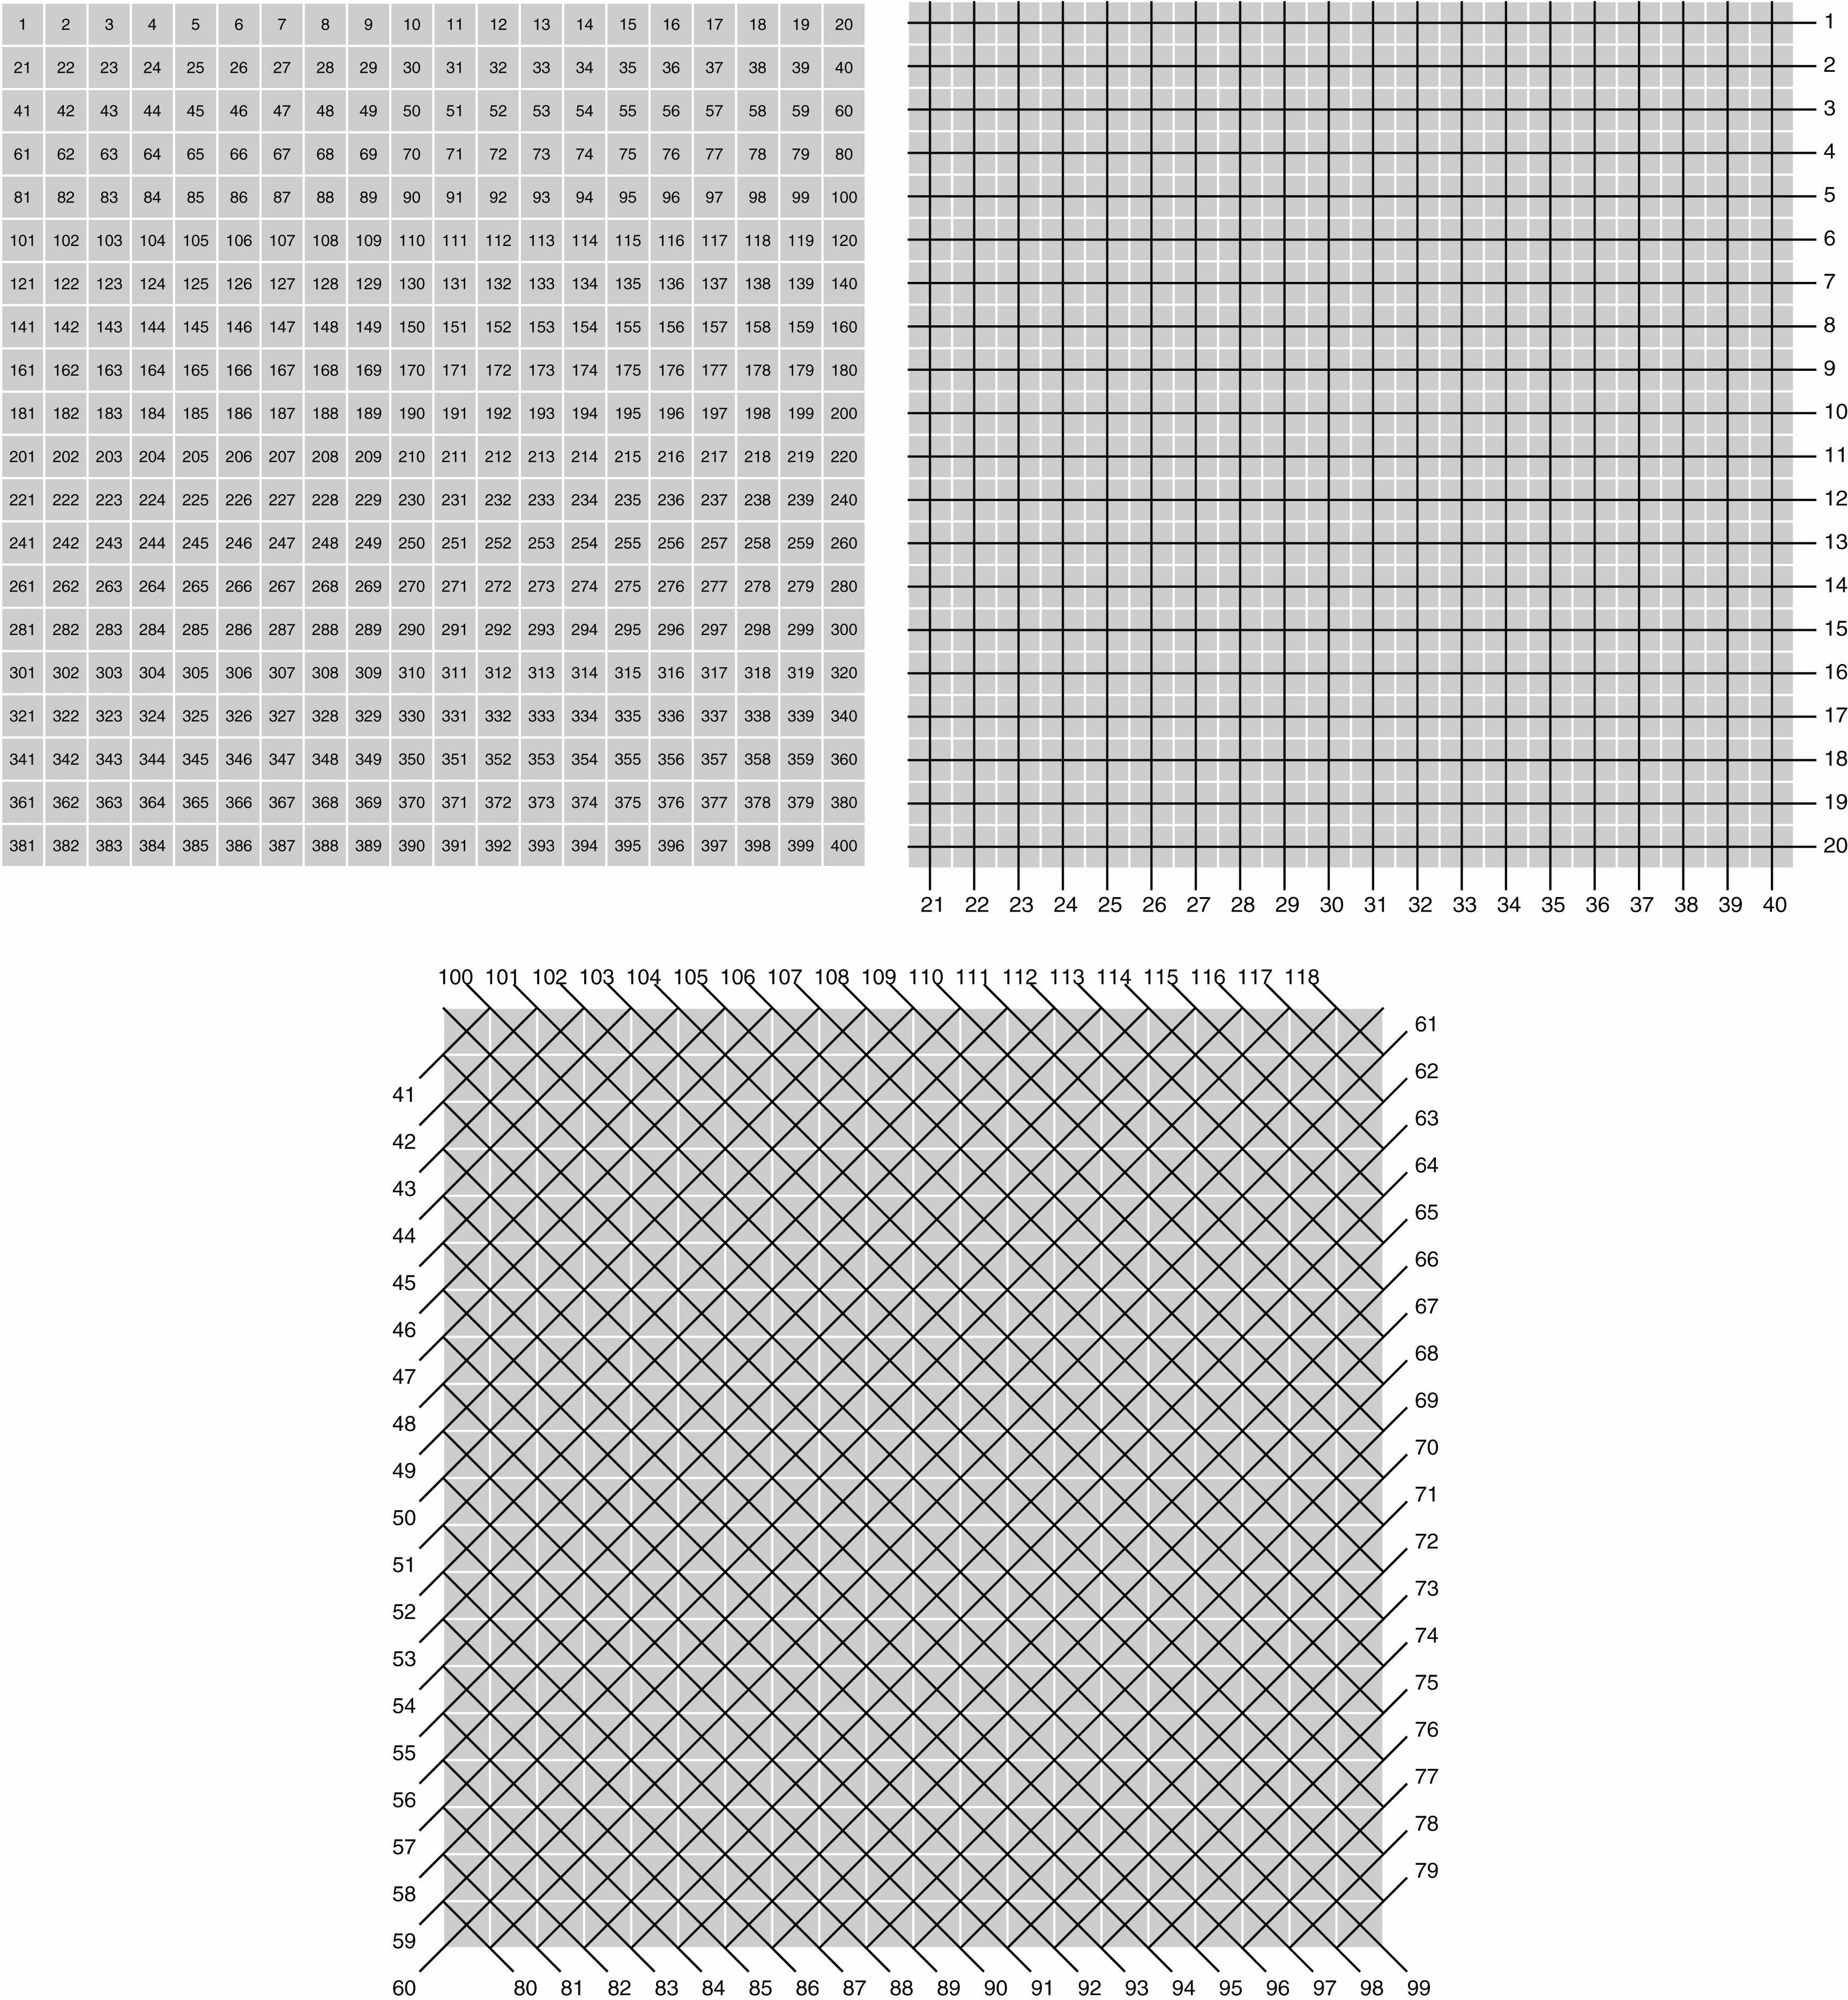

Given this configuration, we can write the travel-time perturbation inversion problem:

$ \mathbf{d} = \mathbf{G} \mathbf{m}$,

$\mathbf{d}$ is the travel-time data, a 1-D array, given by the rays defined in this problem.  $\mathbf{m}$ is the slowness perturbation model, it is a 1-D array that is reshaped  from the 2D grid.  $\mathbf{G}$ is the matrix that calculate the total ray path lengths specific for each ray given. 

### a) How many travel-time data points are there? (1 point)
Write N = integer.

In [ ]:
# answer below
N = 

### b) How many model parameters do we need to fit? (1 point)
write M = integer 

In [ ]:
# answer below
M = 

### c) Is the problem overdetermined or under determined inverse problem? (1 point)
Type the answer in a lowercase string.

In [ ]:
# answer below

### d) Read the $\mathbf{G}$ matrix. (1 point)
Remember the in-class exercise. Start by writing the equations for each ray:

$d_i = \sum_k l_k m_k$, 

where $k$ is the index of the grid block that the ray travel through, and $l_k$ is the length of the ray within that block. $l_k$ is mostly $1$, sometimes $\sqrt{2}$.



* Upload the file called tomo_gmat.csv from Canvas. 





* Use ``pandas`` to read the CSV file. The file has 3 columns: 1 - indexes of the rows of G that have nonzero values, 2 - indexes of the columns of G that have non zeros values, 3 - the non zero values.

* Directly convert the pandas dataframe to a numpy array. examples are ``df.to_numpy()``.

* Declare G as a matrix filled with zeros and of dimensions NxM.


* Fill G of the rows and columns with non zero values.


In [ ]:
from google.colab import drive, files
files.upload()

Saving tomo_gmat.csv to tomo_gmat.csv


{'tomo_gmat.csv': b'1,1,1.000\n1,2,1.000\n1,3,1.000\n1,4,1.000\n1,5,1.000\n1,6,1.000\n1,7,1.000\n1,8,1.000\n1,9,1.000\n1,10,1.000\n1,11,1.000\n1,12,1.000\n1,13,1.000\n1,14,1.000\n1,15,1.000\n1,16,1.000\n1,17,1.000\n1,18,1.000\n1,19,1.000\n1,20,1.000\n2,21,1.000\n2,22,1.000\n2,23,1.000\n2,24,1.000\n2,25,1.000\n2,26,1.000\n2,27,1.000\n2,28,1.000\n2,29,1.000\n2,30,1.000\n2,31,1.000\n2,32,1.000\n2,33,1.000\n2,34,1.000\n2,35,1.000\n2,36,1.000\n2,37,1.000\n2,38,1.000\n2,39,1.000\n2,40,1.000\n3,41,1.000\n3,42,1.000\n3,43,1.000\n3,44,1.000\n3,45,1.000\n3,46,1.000\n3,47,1.000\n3,48,1.000\n3,49,1.000\n3,50,1.000\n3,51,1.000\n3,52,1.000\n3,53,1.000\n3,54,1.000\n3,55,1.000\n3,56,1.000\n3,57,1.000\n3,58,1.000\n3,59,1.000\n3,60,1.000\n4,61,1.000\n4,62,1.000\n4,63,1.000\n4,64,1.000\n4,65,1.000\n4,66,1.000\n4,67,1.000\n4,68,1.000\n4,69,1.000\n4,70,1.000\n4,71,1.000\n4,72,1.000\n4,73,1.000\n4,74,1.000\n4,75,1.000\n4,76,1.000\n4,77,1.000\n4,78,1.000\n4,79,1.000\n4,80,1.000\n5,81,1.000\n5,82,1.000\n5,83,

read the dataframe and convert to numpa

In [ ]:
# read the CSV file. It has as a first column, the row index, second column the column index, third column the non-zero value


Fill in the G matrix

In [ ]:
# G has the dimension of N data x M model parameters.
# note that the index in the CSV file fo from 1 to M, but python needs to go from 0 to M-1.

### d - Bonus (+ 2 points)

Create the G matrix from scratch. Given each equation to express the residual travel time (i.e., giving each row of the G matrix), and the indexes of the grid block

In [ ]:
#answer below

### e) Impulse response test. (3 points)

The _true model_ on the left consists of a uniform slowness perturbation of –0.1 in the six cells defined by rows 14 to 16 and columns 12 to 13 in the grid, and 0.0 perturbations in all other cells. 

The _synthetic data_ is a set of travel time residuals.

The _recovered model_ is obtained by solving the inverse problem of $\mathbf{d} = \mathbf{G} \mathbf{m} $. Use the generalized inverse problem to solve. You can use ``np.linalg.lstsq`` to return the least-square solution (equivalent to the generalized inverse in class).


#### e.1 Write the vector for the true model (1 point) 
_hint_: you can initialize the matrix 20x20 with zeros. Then you can fill the elements with -0.1. Remember that python indexes from 0 to N-1, and that to fill a(12:13), you have to write a[11:13] to fill 2 elements. Use ``np.reshape`` to transform the 2D matrix to 1D array.

In [ ]:
# answer below

#### e.2 Given G, calculate theoretical perturbation arrival time. (1 point)
_hint_: use the numpy function ``dot`` to apply a matrix to a vector.

In [ ]:
# answer below

#### e.3 Invert the synthetic data to recover the velocity model (2 points)

Use the generalized inverse or the least-square to recover the velocity model.

Use the matplotlib function ``plt.matshow()`` to plot the recovered model. 

In [ ]:
# answer below the inversion

(118, 400)
(118, 1)


<ipython-input-10-f19713b16f9a>:4: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  m = np.linalg.lstsq(G,d_synthetic)[0]


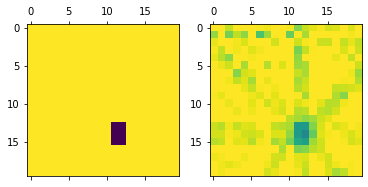

In [ ]:
# plot the matrix, 

### f) Checkerboard test (3 points)

Create a test model with alternating anomalies of in cell squares. Create synthetic data, invert them using damped least
squares, and plot the result.

We use the kronecker function ``kron`` in numpy to create a checkerboard model of a 20 x 20 grid.

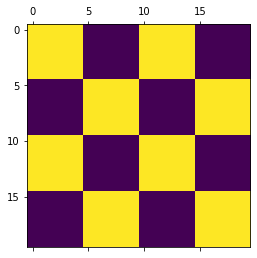

In [ ]:
mm=np.kron([[1, 0] * 2, [0, 1] * 2] *2, np.ones((5, 5)))
plt.matshow(mm)

reshape the array, calculate synthetics, and invert the model just as above. (3 points)

<ipython-input-11-53519da1af5e>:4: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  crapm_2 = np.linalg.lstsq(G,d_synthetic)[0]


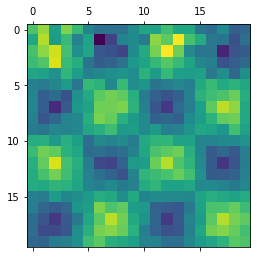

In [ ]:
# answer below

### g) Best ray configurations (1 point)

By selecting a few rays or data points, you can gain some intuition for what the best ray configuration is.

<ipython-input-15-88c309a8f3e4>:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  crapm_2 = np.linalg.lstsq(G[40:80,:],d_synthetic[40:80])[0]


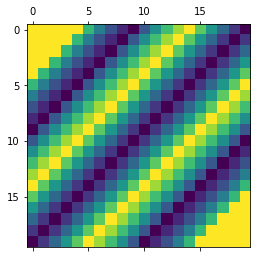

In [ ]:
# below is a cell you can experiment to 1) create

Below, answer the question: Is the best configuration a combination of horiztonal and vertical rays (answer: HV) or diagonal rays (answer D) ? 

In [ ]:
# answer below either HV or D
